Training with learning rate: 0.1
Training with learning rate: 0.2
Training with learning rate: 0.3
Training with learning rate: 0.4
Training with learning rate: 0.5


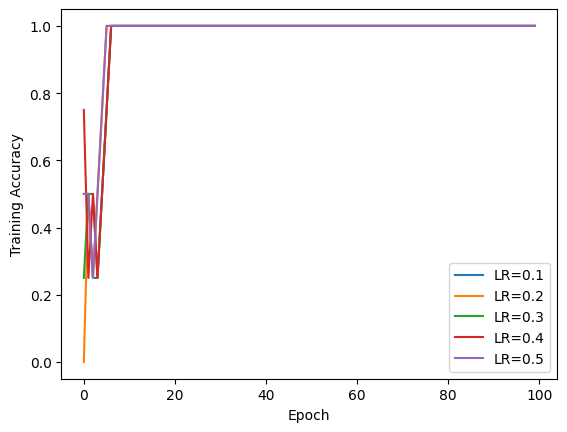

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

# Define the perceptron model with sigmoid activation
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = sigmoid(v)
    return y

# Training the perceptron for different learning rates
def train_perceptron(inputs, targets, learning_rate, num_epochs):
    num_samples = len(inputs)
    num_inputs = len(inputs[0])
    weights = np.random.uniform(-0.3, 0.3, num_inputs)
    bias = random.uniform(-0.3, 0.3)
    accuracy_history = []

    for epoch in range(num_epochs):
        correct_predictions = 0

        for i in range(num_samples):
            input_sample = inputs[i]
            target = targets[i]
            prediction = perceptronModel(input_sample, weights, bias)

            if prediction >= 0.5:
                prediction = 1
            else:
                prediction = 0

            if prediction == target:
                correct_predictions += 1
            else:
                error = target - prediction
                weights += learning_rate * error * input_sample
                bias += learning_rate * error

        accuracy = correct_predictions / num_samples
        accuracy_history.append(accuracy)

    return weights, bias, accuracy_history

# Define the AND data and targets
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_target = np.array([0, 0, 0, 1])
# or_target = np.array([0,1,1,1])

# Training with different learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
num_epochs = 100

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    weights, bias, accuracy_history = train_perceptron(input_data, and_target, lr, num_epochs)
    plt.plot(range(num_epochs), accuracy_history, label=f"LR={lr}")

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()


In [3]:
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size